In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set_context("paper")
sns.set_style("darkgrid")

## Classification Results

In [3]:
base_detr_results_df = pd.read_csv('../../checkpoints/classification_results.csv')
detr_decoder_ensemble_results_df = pd.read_csv('../../logs/detr_r50_4x16_decoder_and_output/classification_results.csv')
detr_full_ensemble_results_df = pd.read_csv('../../logs/detr_r50_8x2_150e_coco/classification_results.csv')

In [4]:
base_detr_results_df

,score_threshold,iou_threshold,ece,nll,acc,ece_matched,nll_matched,acc_matched,count_matched_probs,count_unmatched,count_all_labels,count_all_probs
0,0.0,0.5,0.388556,1.567377,0.350404,0.055089,0.331392,0.944461,20004,9754,77365,77365
1,0.0,0.6,0.412871,1.706787,0.322029,0.046996,0.304189,0.947775,18899,12096,79707,79707
2,0.0,0.7,0.447325,1.914751,0.283483,0.034580,0.286338,0.949232,16723,15498,83109,83109
3,0.0,0.8,0.493015,2.221882,0.232533,0.022189,0.257888,0.953130,13036,20484,88095,88095
4,0.0,0.9,0.553083,2.676267,0.168408,0.014229,0.248244,0.953037,7261,27711,95322,95322


In [5]:
detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average']

,score_threshold,iou_threshold,ece,nll,acc,ece_matched,nll_matched,acc_matched,count_matched_probs,count_unmatched,count_all_labels,count_all_probs,merging_strategy
0,0.0,0.5,0.333753,1.507980,0.396474,0.077220,0.311189,0.945754,19817,10036,68017,68017,average
1,0.0,0.6,0.364065,1.664647,0.361514,0.069127,0.279511,0.950016,18606,12497,70404,70404,average
2,0.0,0.7,0.404917,1.891247,0.315712,0.056640,0.255236,0.952699,16321,15992,73697,73697,average
3,0.0,0.8,0.455843,2.218340,0.259886,0.039897,0.216817,0.956425,12576,21075,77561,77561,average
4,0.0,0.9,0.502783,2.747073,0.202390,0.020759,0.185467,0.959118,6800,28333,77494,77494,average


In [6]:
detr_full_ensemble_results_df

,score_threshold,iou_threshold,ece,nll,acc,ece_matched,nll_matched,acc_matched,count_matched_probs,count_unmatched,count_all_labels,count_all_probs,merging_strategy
0,0.0,0.5,0.321597,1.466312,0.417547,0.089917,0.278520,0.951938,20099,9308,66201,66201,average
1,0.0,0.6,0.350510,1.612102,0.384437,0.083888,0.249872,0.955260,19155,11512,68391,68391,average
2,0.0,0.7,0.390991,1.828549,0.338685,0.073363,0.227634,0.957367,17029,14800,71565,71565,average
3,0.0,0.8,0.445048,2.156130,0.279235,0.058193,0.201212,0.959075,13488,19768,75696,75696,average
4,0.0,0.9,0.502760,2.684044,0.210292,0.037389,0.168980,0.961676,7541,27376,77863,77863,average
5,0.0,0.5,0.340900,1.560606,0.396581,0.083455,0.280129,0.950124,19348,10632,67512,67512,maximal
6,0.0,0.6,0.376479,1.747498,0.355480,0.075696,0.248217,0.954067,17765,13525,70305,70305,maximal
7,0.0,0.7,0.421071,2.005314,0.303778,0.063685,0.219314,0.956937,15094,17508,73896,73896,maximal
8,0.0,0.8,0.471124,2.352870,0.246516,0.047772,0.187096,0.960186,11177,22797,77561,77561,maximal
9,0.0,0.9,0.502890,2.883598,0.200253,0.031142,0.165472,0.959641,5798,29589,74281,74281,maximal


## Classification Comparison by Bounding Box Merging Strategy

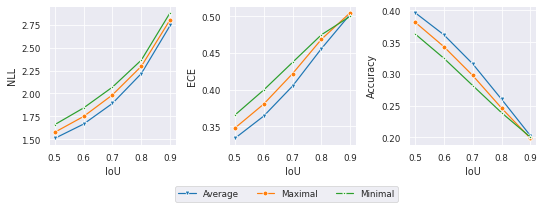

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))
fig.tight_layout(w_pad=2.2)
sns.lineplot(x='iou_threshold', y='nll', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='nll', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[0], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='nll', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[0], marker='*', label='Minimal')
axes[0].set_ylabel('NLL')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()

sns.lineplot(x='iou_threshold', y='ece', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='ece', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[1], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='ece', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[1], marker='*', label='Minimal')
axes[1].set_ylabel('ECE')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()


sns.lineplot(x='iou_threshold', y='acc', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='acc', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[2], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='acc', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[2], marker='*', label='Minimal')
axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('IoU')
axes[2].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[2].get_legend().remove()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.05))
# fig.suptitle('Classification Results across all bounding boxes')
plt.savefig('decoder_ensemble_all_classification_merging_strategy_results.pdf', format='pdf', bbox_inches='tight')

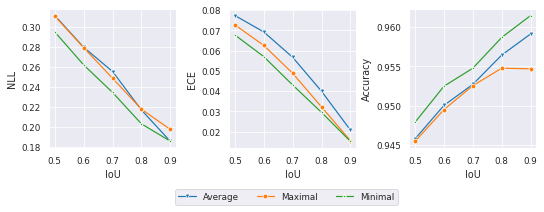

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))
fig.tight_layout(w_pad=2.2)
sns.lineplot(x='iou_threshold', y='nll_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='nll_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[0], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='nll_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[0], marker='*', label='Minimal')
axes[0].set_ylabel('NLL')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()

sns.lineplot(x='iou_threshold', y='ece_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='ece_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[1], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='ece_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[1], marker='*', label='Minimal')
axes[1].set_ylabel('ECE')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()


sns.lineplot(x='iou_threshold', y='acc_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='acc_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[2], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='acc_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[2], marker='*', label='Minimal')
axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('IoU')
axes[2].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[2].get_legend().remove()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.05))
# fig.suptitle('Classification Results across matched bounding boxes')
plt.savefig('decoder_ensemble_matched_classification_merging_strategy_results.pdf', format='pdf', bbox_inches='tight')

In [14]:
detr_decoder_ensemble_results_df['proportion_matched'] = detr_decoder_ensemble_results_df['count_matched_probs']/float(36781.)

In [15]:
detr_decoder_ensemble_results_df

,score_threshold,iou_threshold,ece,nll,acc,ece_matched,nll_matched,acc_matched,count_matched_probs,count_unmatched,count_all_labels,count_all_probs,merging_strategy,proportion_matched
0,0.0,0.5,0.333753,1.507980,0.396474,0.077220,0.311189,0.945754,19817,10036,68017,68017,average,0.538784
1,0.0,0.6,0.364065,1.664647,0.361514,0.069127,0.279511,0.950016,18606,12497,70404,70404,average,0.505859
2,0.0,0.7,0.404917,1.891247,0.315712,0.056640,0.255236,0.952699,16321,15992,73697,73697,average,0.443735
3,0.0,0.8,0.455843,2.218340,0.259886,0.039897,0.216817,0.956425,12576,21075,77561,77561,average,0.341916
4,0.0,0.9,0.502783,2.747073,0.202390,0.020759,0.185467,0.959118,6800,28333,77494,77494,average,0.184878
5,0.0,0.5,0.347653,1.574668,0.381525,0.072597,0.310559,0.945434,19316,11031,69002,69002,maximal,0.525162
6,0.0,0.6,0.380371,1.747990,0.342837,0.062512,0.279106,0.949478,17636,13815,71690,71690,maximal,0.479487
7,0.0,0.7,0.421817,1.984509,0.297410,0.048775,0.248515,0.952530,15020,17558,74984,74984,maximal,0.408363
8,0.0,0.8,0.468557,2.298082,0.245976,0.032172,0.217659,0.954756,11449,22368,78597,78597,maximal,0.311275
9,0.0,0.9,0.504870,2.809549,0.198332,0.015557,0.197362,0.954677,6200,29040,76614,76614,maximal,0.168565


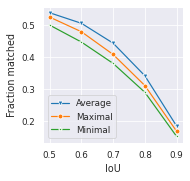

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(2.5, 2.5))

sns.lineplot(x='iou_threshold', y='proportion_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes, marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='proportion_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes, marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='proportion_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes, marker='*', label='Minimal')
axes.set_ylabel('Fraction matched')
axes.set_xlabel('IoU')
axes.set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
plt.savefig('decoder_ensemble_proportion_matched_merging_strategy_results.pdf', format='pdf', bbox_inches='tight')

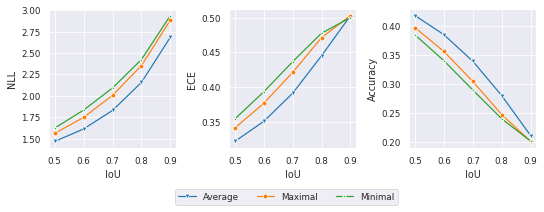

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))
fig.tight_layout(w_pad=2.2)
sns.lineplot(x='iou_threshold', y='nll', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='nll', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[0], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='nll', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[0], marker='*', label='Minimal')
axes[0].set_ylabel('NLL')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()

sns.lineplot(x='iou_threshold', y='ece', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='ece', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[1], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='ece', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[1], marker='*', label='Minimal')
axes[1].set_ylabel('ECE')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()


sns.lineplot(x='iou_threshold', y='acc', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='acc', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[2], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='acc', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[2], marker='*', label='Minimal')
axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('IoU')
axes[2].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[2].get_legend().remove()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.05))
# fig.suptitle('Classification Results across all bounding boxes')
plt.savefig('full_ensemble_all_classification_merging_strategy_results.pdf', format='pdf', bbox_inches='tight')

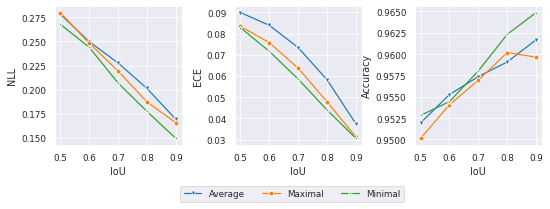

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))
fig.tight_layout(w_pad=2.2)
sns.lineplot(x='iou_threshold', y='nll_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='nll_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[0], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='nll_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[0], marker='*', label='Minimal')
axes[0].set_ylabel('NLL')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()

sns.lineplot(x='iou_threshold', y='ece_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='ece_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[1], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='ece_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[1], marker='*', label='Minimal')
axes[1].set_ylabel('ECE')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()


sns.lineplot(x='iou_threshold', y='acc_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='acc_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[2], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='acc_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[2], marker='*', label='Minimal')
axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('IoU')
axes[2].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[2].get_legend().remove()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.05))
# fig.suptitle('Classification Results across matched bounding boxes')
plt.savefig('full_ensemble_matched_classification_merging_strategy_results.pdf', format='pdf', bbox_inches='tight')

In [22]:
detr_full_ensemble_results_df['proportion_matched'] = detr_full_ensemble_results_df['count_matched_probs']/float(36781.)

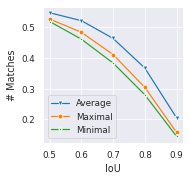

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(2.5, 2.5))

sns.lineplot(x='iou_threshold', y='proportion_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes, marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='proportion_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes, marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='proportion_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes, marker='*', label='Minimal')
axes.set_ylabel('# Matches')
axes.set_xlabel('IoU')
axes.set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
plt.savefig('full_ensemble_proportion_matched_merging_strategy_results.pdf', format='pdf', bbox_inches='tight')

## Classification performance comparison across different inference methods

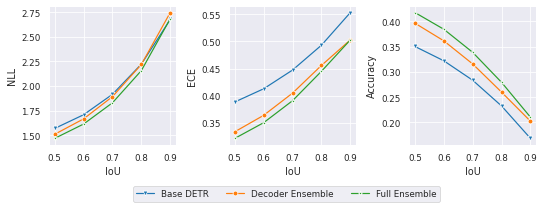

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))
fig.tight_layout(w_pad=2.2)

sns.lineplot(x='iou_threshold', y='nll', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='nll', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='nll', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='*', label='Full Ensemble')
axes[0].set_ylabel('NLL')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou_threshold', y='ece', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='ece', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='ece', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='*', label='Full Ensemble')
axes[1].set_ylabel('ECE')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()
sns.lineplot(x='iou_threshold', y='acc', data=base_detr_results_df, ax=axes[2], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='acc', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='acc', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='*', label='Full Ensemble')

axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('IoU')
axes[2].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[2].get_legend().remove()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -.05))
# fig.suptitle('Classification Results across ALL bounding boxes')
plt.savefig('classification_results_all_boxes.pdf', format='pdf', bbox_inches='tight')

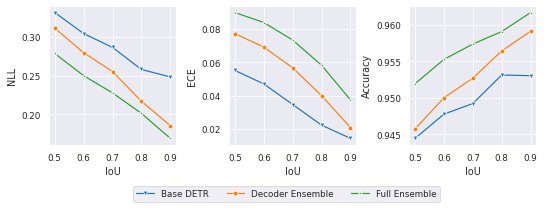

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))
fig.tight_layout(w_pad=2.2)

sns.lineplot(x='iou_threshold', y='nll_matched', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='nll_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='nll_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='*', label='Full Ensemble')
axes[0].set_ylabel('NLL')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou_threshold', y='ece_matched', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='ece_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='ece_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='*', label='Full Ensemble')
axes[1].set_ylabel('ECE')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()
sns.lineplot(x='iou_threshold', y='acc_matched', data=base_detr_results_df, ax=axes[2], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='acc_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='acc_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='*', label='Full Ensemble')

axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('IoU')
axes[2].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[2].get_legend().remove()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -.05))
# fig.suptitle('Classification Results across matched bounding boxes')
plt.savefig('classification_results_matched_boxes.pdf', format='pdf', bbox_inches='tight')

In [27]:
base_detr_results_df['proportion_matched'] = base_detr_results_df['count_matched_probs']/float(36781.)

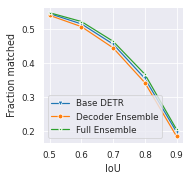

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(2.5, 2.5))

sns.lineplot(x='iou_threshold', y='proportion_matched', data=base_detr_results_df, ax=axes, marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='proportion_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes, marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='proportion_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes, marker='*', label='Full Ensemble')
axes.set_ylabel('Fraction matched')
axes.set_xlabel('IoU')
axes.set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
plt.savefig('proportion_matched_results.pdf', format='pdf', bbox_inches='tight')

## Coverage & Precision Results

In [1]:
# base_detr_results = {
# 0.5 : (0.27898370087404856, 0.3107749981931961, 0.30671457060320395),
# 0.6 : (0.2545188232752138, 0.2785261042083046, 0.27684842607838517),
# 0.7 : (0.2173413994865696, 0.23356270997008374, 0.23280175033871198),
# 0.8 : (0.16241360023415613, 0.1710616869812514, 0.17065853350170218),
# 0.9 : (0.08536157270546453, 0.08797507262523059, 0.08775079314053548),
# }

# base_detr_results_df = pd.DataFrame.from_dict(base_detr_results, columns=['mean_iou', 'coverage', 'precision'], orient='index')
# base_detr_results_df.reset_index(inplace=True)
# base_detr_results_df = base_detr_results_df.rename(columns = {'index':'iou'})

# detr_decoder_ensemble_results = {
# 0.5 : (0.31138518223402445, 0.3461010847065626, 0.345465240369838), 
# 0.6 : (0.28125806922978963, 0.3073006375792217, 0.308083815612627), 
# 0.7 : (0.23713784899619142, 0.25443064567947843, 0.25549602946009464), 
# 0.8 : (0.17355949452229621, 0.18256520841294457, 0.18313123285487964), 
# 0.9 : (0.08726219895490583, 0.08981045860261914, 0.08994831456431358), 
# }

# detr_decoder_ensemble_results_df = pd.DataFrame.from_dict(detr_decoder_ensemble_results, columns=['mean_iou', 'coverage', 'precision'], orient='index')
# detr_decoder_ensemble_results_df.reset_index(inplace=True)
# detr_decoder_ensemble_results_df = detr_decoder_ensemble_results_df.rename(columns={'index':'iou'})

# detr_full_ensemble_results = {
#     0.5 : (0.332786279341308, 0.3692995355060119, 0.36558158761119053),
#     0.6 : (0.30428190360556745, 0.3323352542278105, 0.3307790261997101),
#     0.7 : (0.2604124638534546, 0.27935132611957725, 0.2791889792188043),
#     0.8 : (0.19473878703094188, 0.20492785574629444, 0.204980611369956),
#     0.9 : (0.10016339159300792, 0.10310038787552123, 0.10315194630745286),
# }

# detr_full_ensemble_results_df = pd.DataFrame.from_dict(detr_full_ensemble_results, columns=['mean_iou', 'coverage', 'precision'], orient='index')
# detr_full_ensemble_results_df.reset_index(inplace=True)
# detr_full_ensemble_results_df = detr_full_ensemble_results_df.rename(columns={'index':'iou'})

In [4]:
base_detr_results_df = pd.read_csv('../../checkpoints/coverage_precision.csv')
detr_decoder_ensemble_results_df = pd.read_csv('../../logs/detr_r50_4x16_decoder_and_output/coverage_precision.csv')
detr_full_ensemble_results_df = pd.read_csv('../../logs/detr_r50_8x2_150e_coco/coverage_precision.csv')

In [5]:
base_detr_results_df

,score_threshold,iou_threshold,all_ious,all_coverage,all_sharpness,matched_ious,matched_coverage,matched_sharpness
0,0.0,0.5,0.278984,0.310775,0.306715,0.812023,0.904556,0.892738
1,0.0,0.6,0.254519,0.278526,0.276848,0.836989,0.915937,0.910420
2,0.0,0.7,0.217341,0.233563,0.232802,0.866914,0.931617,0.928581
3,0.0,0.8,0.162414,0.171062,0.170659,0.902702,0.950768,0.948528
4,0.0,0.9,0.085362,0.087975,0.087751,0.943620,0.972511,0.970031


In [6]:
detr_decoder_ensemble_results_df

,score_threshold,iou_threshold,all_ious,all_coverage,all_sharpness,matched_ious,matched_coverage,matched_sharpness,merging_strategy
0,0.0,0.5,0.268639,0.285324,0.318188,0.791110,0.840245,0.937024,minimal
1,0.0,0.6,0.235234,0.247312,0.270275,0.825354,0.867728,0.948300,minimal
2,0.0,0.7,0.193929,0.201898,0.215930,0.861268,0.896660,0.958978,minimal
3,0.0,0.8,0.142426,0.146756,0.153683,0.898699,0.926020,0.969727,minimal
4,0.0,0.9,0.071162,0.072460,0.074184,0.941835,0.959015,0.981839,minimal
5,0.0,0.5,0.291687,0.344574,0.308807,0.796495,0.940913,0.843245,maximal
6,0.0,0.6,0.258997,0.297210,0.272289,0.826689,0.948662,0.869117,maximal
7,0.0,0.7,0.213932,0.237929,0.222897,0.861632,0.958281,0.897736,maximal
8,0.0,0.8,0.156141,0.168241,0.161013,0.899256,0.968942,0.927318,maximal
9,0.0,0.9,0.078853,0.082169,0.080333,0.941744,0.981345,0.959417,maximal


In [8]:
detr_full_ensemble_results_df

,score_threshold,iou_threshold,all_ious,all_coverage,all_sharpness,matched_ious,matched_coverage,matched_sharpness,merging_strategy
0,0.0,0.5,0.282406,0.296046,0.342915,0.782114,0.819891,0.949690,minimal
1,0.0,0.6,0.244945,0.254419,0.288026,0.816675,0.848261,0.960308,minimal
2,0.0,0.7,0.196754,0.202559,0.223157,0.855159,0.880392,0.969915,minimal
3,0.0,0.8,0.138587,0.141539,0.151289,0.896301,0.915394,0.978452,minimal
4,0.0,0.9,0.067228,0.068117,0.070520,0.940685,0.953130,0.986752,minimal
5,0.0,0.5,0.300529,0.363914,0.313055,0.790297,0.956979,0.823237,maximal
6,0.0,0.6,0.265497,0.311918,0.274852,0.820414,0.963859,0.849320,maximal
7,0.0,0.7,0.216383,0.245576,0.222450,0.855911,0.971384,0.879908,maximal
8,0.0,0.8,0.152153,0.166157,0.155319,0.896484,0.978992,0.915136,maximal
9,0.0,0.9,0.073329,0.076911,0.074273,0.941105,0.987076,0.953223,maximal


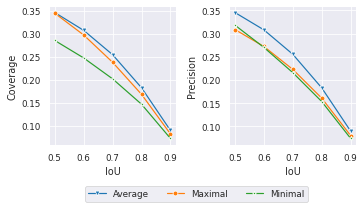

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(5., 2.5))
fig.tight_layout(w_pad=2.2)
sns.lineplot(x='iou_threshold', y='all_coverage', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='all_coverage', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[0], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='all_coverage', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[0], marker='*', label='Minimal')
axes[0].set_ylabel('Coverage')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()

sns.lineplot(x='iou_threshold', y='all_sharpness', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='all_sharpness', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[1], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='all_sharpness', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[1], marker='*', label='Minimal')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()


handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.05))
# fig.suptitle('Classification Results across all bounding boxes')
plt.savefig('decoder_ensemble_all_coverage_precision_merging_strategy_results.pdf', format='pdf', bbox_inches='tight')

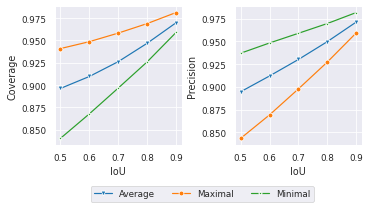

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(5., 2.5))
fig.tight_layout(w_pad=2.2)
sns.lineplot(x='iou_threshold', y='matched_coverage', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='matched_coverage', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[0], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='matched_coverage', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[0], marker='*', label='Minimal')
axes[0].set_ylabel('Coverage')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()

sns.lineplot(x='iou_threshold', y='matched_sharpness', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='matched_sharpness', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[1], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='matched_sharpness', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[1], marker='*', label='Minimal')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()


handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.05))
# fig.suptitle('Classification Results across matched bounding boxes')
plt.savefig('decoder_ensemble_matched_coverage_precision_merging_strategy_results.pdf', format='pdf', bbox_inches='tight')

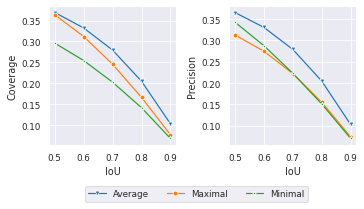

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(5., 2.5))
fig.tight_layout(w_pad=2.2)
sns.lineplot(x='iou_threshold', y='all_coverage', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='all_coverage', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[0], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='all_coverage', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[0], marker='*', label='Minimal')
axes[0].set_ylabel('Coverage')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()

sns.lineplot(x='iou_threshold', y='all_sharpness', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='all_sharpness', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[1], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='all_sharpness', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[1], marker='*', label='Minimal')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()


handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.05))
# fig.suptitle('Classification Results across all bounding boxes')
plt.savefig('full_ensemble_all_coverage_precision_merging_strategy_results.pdf', format='pdf', bbox_inches='tight')

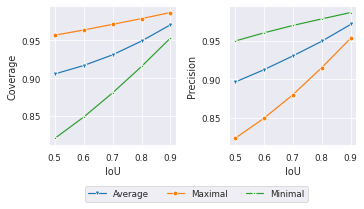

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(5., 2.5))
fig.tight_layout(w_pad=2.2)
sns.lineplot(x='iou_threshold', y='matched_coverage', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='matched_coverage', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[0], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='matched_coverage', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[0], marker='*', label='Minimal')
axes[0].set_ylabel('Coverage')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()

sns.lineplot(x='iou_threshold', y='matched_sharpness', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='v', label='Average')
sns.lineplot(x='iou_threshold', y='matched_sharpness', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='maximal'], ax=axes[1], marker='o', label='Maximal')
sns.lineplot(x='iou_threshold', y='matched_sharpness', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='minimal'], ax=axes[1], marker='*', label='Minimal')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()


handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.05))
# fig.suptitle('Classification Results across matched bounding boxes')
plt.savefig('full_ensemble_matched_coverage_precision_merging_strategy_results.pdf', format='pdf', bbox_inches='tight')

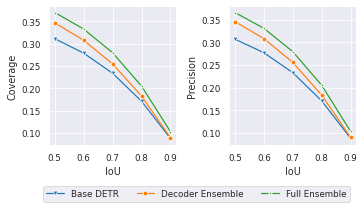

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(5., 2.5))
fig.tight_layout(w_pad=2.2)

sns.lineplot(x='iou_threshold', y='all_coverage', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='all_coverage', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='all_coverage', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='*', label='Full Ensemble')
axes[0].set_ylabel('Coverage')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou_threshold', y='all_sharpness', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='all_sharpness', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='all_sharpness', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='*', label='Full Ensemble')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -.05))
# fig.suptitle('Classification Results across ALL bounding boxes')
plt.savefig('coverage_precision_results_all_boxes.pdf', format='pdf', bbox_inches='tight')

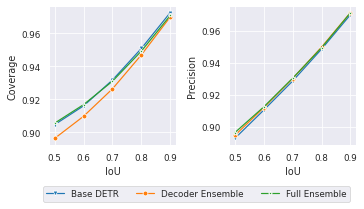

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(5., 2.5))
fig.tight_layout(w_pad=2.2)

sns.lineplot(x='iou_threshold', y='matched_coverage', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='matched_coverage', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='matched_coverage', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='*', label='Full Ensemble')
axes[0].set_ylabel('Coverage')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou_threshold', y='matched_sharpness', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='matched_sharpness', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='matched_sharpness', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='*', label='Full Ensemble')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -.05))
# fig.suptitle('Classification Results across ALL bounding boxes')
plt.savefig('coverage_precision_results_matched_boxes.pdf', format='pdf', bbox_inches='tight')

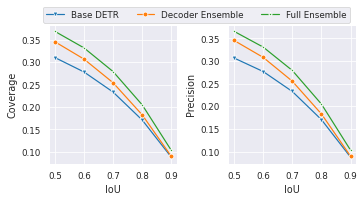

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(5, 2.5))
fig.tight_layout(w_pad=2)
sns.lineplot(x='iou', y='coverage', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou', y='coverage', data=detr_decoder_ensemble_results_df, ax=axes[0], marker='o', label='Dec. Ensemble')
sns.lineplot(x='iou', y='coverage', data=detr_full_ensemble_results_df, ax=axes[0], marker='*', label='Ensemble')
axes[0].set_ylabel('Coverage')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou', y='precision', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou', y='precision', data=detr_decoder_ensemble_results_df, ax=axes[1], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou', y='precision', data=detr_full_ensemble_results_df, ax=axes[1], marker='*', label='Full Ensemble')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.savefig('coverage_precision_results.pdf', format='pdf', bbox_inches='tight')

# Latency-Aware Results

## Classification Results

In [4]:
base_detr_results_df = pd.read_csv('../../checkpoints/classification_results.csv')
detr_decoder_ensemble_results_df = pd.read_csv('../../logs/detr_r50_4x16_decoder_and_output/classification_results_18_ensemble.csv')
detr_full_ensemble_results_df = pd.read_csv('../../logs/detr_r50_8x2_150e_coco/classification_results_5_ensemble.csv')

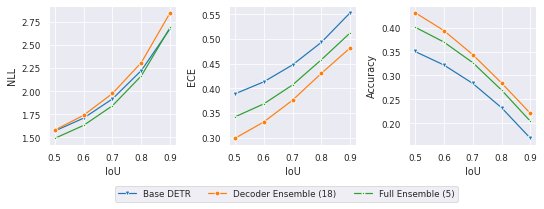

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))
fig.tight_layout(w_pad=2.2)

sns.lineplot(x='iou_threshold', y='nll', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='nll', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='nll', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='*', label='Full Ensemble')
axes[0].set_ylabel('NLL')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou_threshold', y='ece', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='ece', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='ece', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='*', label='Full Ensemble')
axes[1].set_ylabel('ECE')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()
sns.lineplot(x='iou_threshold', y='acc', data=base_detr_results_df, ax=axes[2], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='acc', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='o', label='Decoder Ensemble (18)')
sns.lineplot(x='iou_threshold', y='acc', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='*', label='Full Ensemble (5)')

axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('IoU')
axes[2].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[2].get_legend().remove()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -.05))
# fig.suptitle('Classification Results across ALL bounding boxes')
plt.savefig('classification_results_all_boxes_latency_aware.pdf', format='pdf', bbox_inches='tight')

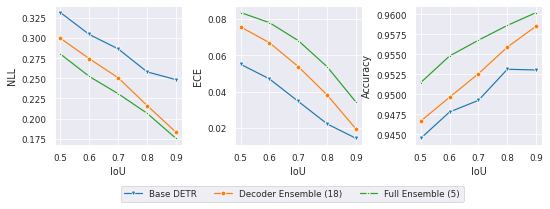

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))
fig.tight_layout(w_pad=2.2)

sns.lineplot(x='iou_threshold', y='nll_matched', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='nll_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='nll_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='*', label='Full Ensemble')
axes[0].set_ylabel('NLL')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou_threshold', y='ece_matched', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='ece_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='ece_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='*', label='Full Ensemble')
axes[1].set_ylabel('ECE')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()
sns.lineplot(x='iou_threshold', y='acc_matched', data=base_detr_results_df, ax=axes[2], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='acc_matched', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='o', label='Decoder Ensemble (18)')
sns.lineplot(x='iou_threshold', y='acc_matched', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[2], marker='*', label='Full Ensemble (5)')

axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('IoU')
axes[2].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[2].get_legend().remove()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -.05))
# fig.suptitle('Classification Results across matched bounding boxes')
plt.savefig('classification_results_matched_boxes_latency_aware.pdf', format='pdf', bbox_inches='tight')

## Coverage and Precision Results

In [11]:
base_detr_results_df = pd.read_csv('../../checkpoints/coverage_precision.csv')
detr_decoder_ensemble_results_df = pd.read_csv('../../logs/detr_r50_4x16_decoder_and_output/coverage_precision_18_ensemble.csv')
detr_full_ensemble_results_df = pd.read_csv('../../logs/detr_r50_8x2_150e_coco/coverage_precision_5_ensemble.csv')

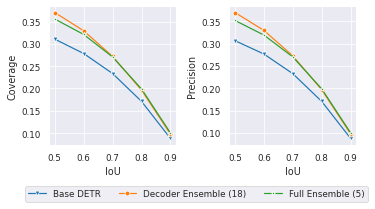

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(5., 2.5))
fig.tight_layout(w_pad=2.2)

sns.lineplot(x='iou_threshold', y='all_coverage', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='all_coverage', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='all_coverage', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='*', label='Full Ensemble')
axes[0].set_ylabel('Coverage')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou_threshold', y='all_sharpness', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='all_sharpness', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='o', label='Decoder Ensemble (18)')
sns.lineplot(x='iou_threshold', y='all_sharpness', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='*', label='Full Ensemble (5)')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -.05))
# fig.suptitle('Classification Results across ALL bounding boxes')
plt.savefig('coverage_precision_results_all_boxes_latency_aware.pdf', format='pdf', bbox_inches='tight')

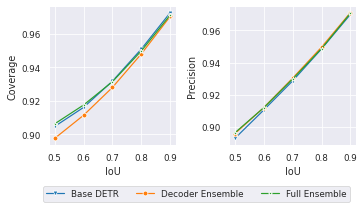

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(5., 2.5))
fig.tight_layout(w_pad=2.2)

sns.lineplot(x='iou_threshold', y='matched_coverage', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='matched_coverage', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='matched_coverage', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[0], marker='*', label='Full Ensemble')
axes[0].set_ylabel('Coverage')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou_threshold', y='matched_sharpness', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou_threshold', y='matched_sharpness', data=detr_decoder_ensemble_results_df[detr_decoder_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='o', label='Decoder Ensemble')
sns.lineplot(x='iou_threshold', y='matched_sharpness', data=detr_full_ensemble_results_df[detr_full_ensemble_results_df['merging_strategy']=='average'], ax=axes[1], marker='*', label='Full Ensemble')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -.05))
# fig.suptitle('Classification Results across ALL bounding boxes')
plt.savefig('coverage_precision_results_matched_boxes_latency_aware.pdf', format='pdf', bbox_inches='tight')